## CISC 614 - Assignment 1
#### Simulation grades and happiness vs hard work and cheating
#### Roman Moser 187700

#### ABSTRACT
<br>
With this assignment I am building and performing a simulation for a student's happiness and grades which are based on hard work, cheating, prior happiness and prior grades. Two different scenarios are simulated and plotted to investigate how the students' happiness and grades change with limited amount of work and increasing amount of cheating vs. with increasing amount of hard work and no cheating.

#### INTRODUCTION
<br>
The simulation is based on a grade and happiness stock which are both defined on a scale from 0 to 100. At every time step the grade and happiness can change incrementally depending on an increasing flow (inflow) and a decreasing flow (outflow). The grade increases depending on hard work and cheating and decreases depending on the probability of getting caught cheating. The happiness increases with good prior grades, hard work (up to a certain point) and decreases with bad prior grades, less hard or too much hard work as well as cheating and the probability of getting caught cheating.

The purpose of this report is to demonstrate how and to which degree the assumptions made (and the model that is built accordingly) result in the expected outcomes. More specifically, we expect hard work and cheating to result in good grades and good grades and hard work to result in happiness. However, it is interesting to investigate the effect of cheating which has the upside of potentially better grades that would lead to more happiness but the downside of directly decrease happiness and decrease the grades through the possibility of getting caught cheating.

#### METHODS
<br>
The model is developed in Python (see the code below). The class "HappinessGrade" is initialized with a happiness of 50 and a grade of 0. There are two private methods to the class. The method "hard_work_happiness" calculates the happiness based on hard work. This method combines two linear functions, one for the case of hard work below 80, where the happiness due to hard work linearly increases up to 100 and one for the case of hard work between 80 and 100, where the happiness decreases due to too much work. The method "getting_caught_cheating" calculates the probability by multiplying a random probability (uniform distribution) with the amount of cheating.
<br>
<br>
The method "one_step" takes a value for hard work and cheating and updates the grade and happiness according to the previously described mechanisms. The parameters in the method have been picked heurstically and change in them would affect the dynamics of the model (e.g. cheating could affect the happiness more severely, the probablity of getting caught could change, etc.). The incremental factor, which has been set to 0.1, determines by how much the grade and happiness can change at each time step. Increasing this factor would make the model more sensitive.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import random

In [2]:
INCREMENTAL_FACTOR = 0.1
# define class for simulations:
class HappinessGrade():
    def __init__(self, initial_grade=0, initial_happiness=50):
        self.grade = initial_grade
        self.happiness = initial_happiness
        self.grade_array = [initial_grade]
        self.happiness_array = [initial_happiness]
    
    def _hard_work_happiness(self, hard_work):
        """
        assume good vibes increase with hard work from 0 to 80 in linear
        fashion from 0 to 100 and decrease with hard work from 80 to 100
        from 100 to 0. Bad vibes equal 100 - good vibes
        """
        if hard_work <= 80:
            hard_work_good_vibes = (100 / 80) * hard_work
        else:
            hard_work_good_vibes = 100 - (100 / 20) * (hard_work - 80)
        hard_work_bad_vibes = 100 - hard_work_good_vibes
        return hard_work_good_vibes, hard_work_bad_vibes
    
    def _getting_caught_cheating(self, cheating):
        """
        assume the probability of cheating is a random factor between 0 and
        1 times cheating (between 0 and 100) divided by 100
        """
        return random.random() * cheating / 100

    def one_step(self, hard_work, cheating):
        # calculate parameters:
        hard_work_good_vibes, hard_work_bad_vibes = \
            self._hard_work_happiness(hard_work)
        getting_caught_cheating = self._getting_caught_cheating(cheating)
        increasing_grade_flow = 0.8 * hard_work + 0.2 * cheating
        decreasing_grade_flow = getting_caught_cheating * 100
        good_vibes = 0.5 * self.grade_array[-1] + 0.5 * hard_work_good_vibes
        bad_vibes = 0.5 * (100 - self.grade_array[-1]) + 0.5 * \
            hard_work_bad_vibes + 0.2 * (cheating + getting_caught_cheating * 100)
        
        # calculate new grade and happiness:
        self.grade += INCREMENTAL_FACTOR * (increasing_grade_flow - \
                                            decreasing_grade_flow)
        self.grade = min(100, max(0, self.grade))
        self.grade_array.append(self.grade)
        self.happiness += INCREMENTAL_FACTOR * (good_vibes - bad_vibes)
        self.happiness = min(100, max(0, self.happiness))
        self.happiness_array.append(self.happiness)

Two scenarios have been defined. Scenario 1 simulates a student that leans more towards cheating and less towards hard work over the course of the simulation and assumes cheating increases from 0 to 100 over the time of the simulation, while hard work increases from 0 to 50 and then decreases from 50 back to 0. Scenario 2 simulates a student that never cheats and works harder and harder (from 0 to 100) over the course of the simulation.

In [3]:
# define inputs scenario 1
hard_work_array_s1 = list(np.linspace(0, 50, 50)) + list(np.linspace(50, 0, 50))
cheating_array_s1 = list(np.linspace(0, 100, 100))
# define inputs scenario 2
hard_work_array_s2 = list(np.linspace(0, 100, 100))
cheating_array_s2 = list(np.zeros(100))

In [4]:
# run simulations:
happiness_grade_s1 = HappinessGrade()
for hard_work, cheating in zip(hard_work_array_s1, cheating_array_s1):
    happiness_grade_s1.one_step(hard_work, cheating)
happiness_grade_s2 = HappinessGrade()
for hard_work, cheating in zip(hard_work_array_s2, cheating_array_s2):
    happiness_grade_s2.one_step(hard_work, cheating)

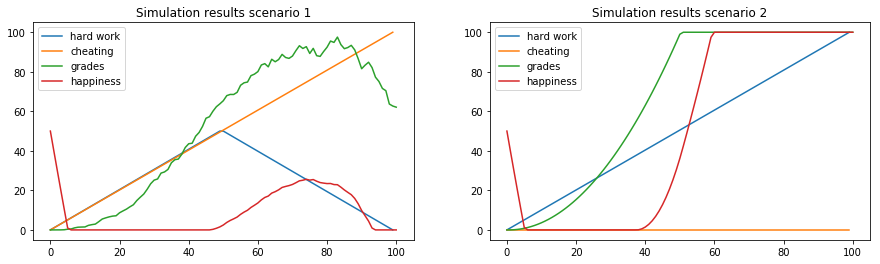

In [5]:
# plots:
rcParams['figure.figsize'] = 15, 4
plt.subplot(1, 2, 1)
plt.plot(hard_work_array_s1, label='hard work')
plt.plot(cheating_array_s1, label='cheating')
plt.plot(happiness_grade_s1.grade_array, label='grades')
plt.plot(happiness_grade_s1.happiness_array, label='happiness')
plt.legend(loc='best')
plt.title('Simulation results scenario 1')
plt.subplot(1, 2, 2)
plt.plot(hard_work_array_s2, label='hard work')
plt.plot(cheating_array_s2, label='cheating')
plt.plot(happiness_grade_s2.grade_array, label='grades')
plt.plot(happiness_grade_s2.happiness_array, label='happiness')
plt.legend(loc='best')
plt.title('Simulation results scenario 2')
plt.show()

#### CONCLUSIONS
<br>
In Scenario 1 we can see that the initial happiness quickly decreases from 50 to 0 as the student initially doesn't work hard and has grades close to 0. During the first half of the simulation, as hard work and cheating increase, the grade starts to improve while the happiness stays at 0. The happiness does not improve because the effect of cheating and hard work offset each other and the grades are not yet good enough to increase happiness. In the second half of the simulation the student puts less effort into hard work and more into cheating. Initially this behavior further improves the grades as cheating is rewarded. The good grades even improve the student's happiness. However, as cheating keeps increasing (and the probability of getting caught cheating increases) and hard work keeps decreasing, the grades and happiness decrease again.
<br>
<br>
In Scenario 2 we simulate a student who refrains from cheating and who's hard work increases over the course of the simulation. We see that the grades start to increase quickly in the beginning of the simulation and reach the maximum at half of the simulation time. Unlike in the first scenario the grade and happiness curves are smooth. This is because there is no random factor involved because there is no cheating and hence the probability of getting caught is always 0. The happiness also starts to increase at around 40% of the simulation and reaches a maximum soon thereafter. Interestingly the happiness stays at 100 until the end of the simulation even though when hard work is greater then 80 happiness due to hard work starts to decrease again. This is because the effect of prior good grades is able to offset the effect of unhappyness due to too much work.

#### ACKNOWLEDGEMENT
<br>
I hereby certify that this assignment exclusively contains my own work and acknowledge that I understand and recognize the severe consequences of plagiarism and misconduct. 